# EDAMI project
## Mining association rules with dEclat algorithm

Authors:
- Robert Wojtaś
- Jakub Sikora

#### Load modules

In [1]:
from Transactional import read_csv
from dEclat import dEclat, dEclatControl
from dEclat.Rules import rulesInduction, InductionControl

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

#### Read data from .csv file and convert it to transactional format

In [3]:
db = read_csv("./data/mushrooms.csv")

### Generate frequent itemsets and associations rules

#### Mine frequent itemsets with dEclat algorithm

In [4]:
DE_params = dEclatControl(support=0.5, minlen=1, maxlen=10)
frequentItemsets = dEclat(db, DE_params)

#### Induce rules from frequent itemsets

In [5]:
RI_params = InductionControl(confidence=0.5)
ruleset = rulesInduction(frequentItemsets, db, RI_params)

#### Convert ruleset to pandas data frame

In [6]:
df = ruleset.as_data_frame()
df

,lhs,rhs,support,confidence,lift
0,[gill-attachment=FREE],[class=EDIBLE],0.510456,0.523902,0.982434
1,[class=EDIBLE],[gill-attachment=FREE],0.510456,0.957219,0.982434
2,[veil-type=PARTIAL],[class=EDIBLE],0.533270,0.533270,1.000000
3,[class=EDIBLE],[veil-type=PARTIAL],0.533270,1.000000,1.000000
4,[veil-color=WHITE],[class=EDIBLE],0.510456,0.522882,0.980521
...,...,...,...,...,...
458,"[stalk-color-below-ring=WHITE, veil-color=WHITE]",[veil-type=PARTIAL],0.551331,1.000000,1.000000
459,"[stalk-color-below-ring=WHITE, veil-type=PARTIAL]",[veil-color=WHITE],0.551331,1.000000,1.024343
460,"[veil-color=WHITE, ring-number=ONE]",[veil-type=PARTIAL],0.899240,1.000000,1.000000
461,"[veil-type=PARTIAL, ring-number=ONE]",[veil-color=WHITE],0.899240,0.974253,0.997969


In [7]:
df.describe()

,support,confidence,lift
count,463.000000,463.000000,463.000000
mean,0.600377,0.866897,1.006129
std,0.111489,0.164156,0.039924
min,0.500000,0.522882,0.931757
25%,0.528042,0.690732,0.988002
50%,0.563688,0.957968,1.000000
75%,0.608840,1.000000,1.024343
max,0.976236,1.000000,1.318040


### Scatter plots of each rule

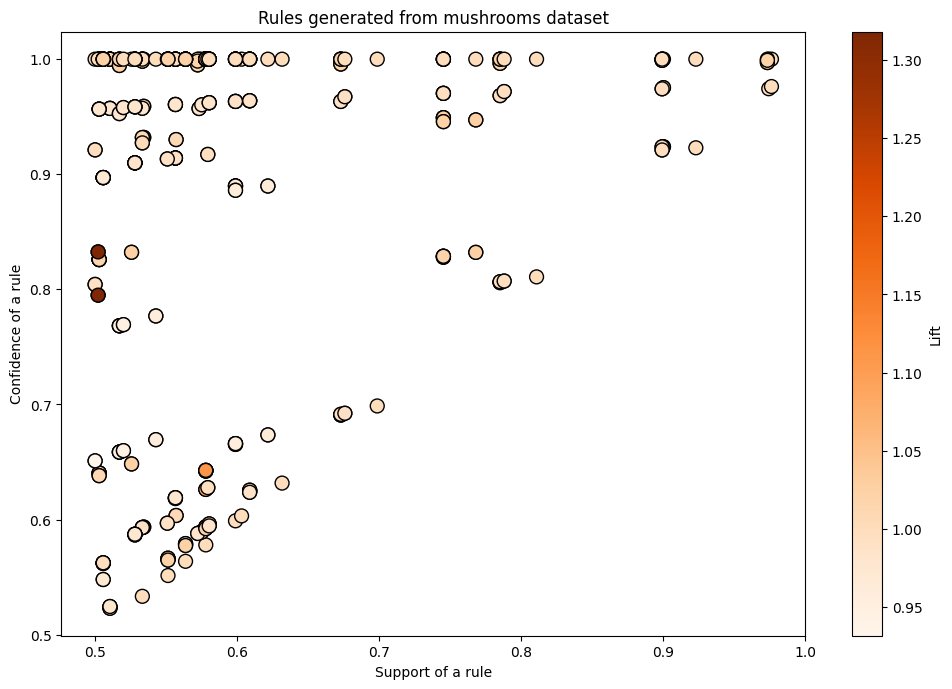

In [8]:
fig=plt.figure(figsize=(12,8), dpi=100)
sc = plt.scatter(df["support"], df["confidence"], c=df["lift"], cmap="Oranges", s=100, edgecolors="black")
bar = fig.colorbar(sc, label='Lift')
plt.title("Rules generated from mushrooms dataset")
plt.xlabel("Support of a rule")
plt.ylabel("Confidence of a rule")
plt.show()

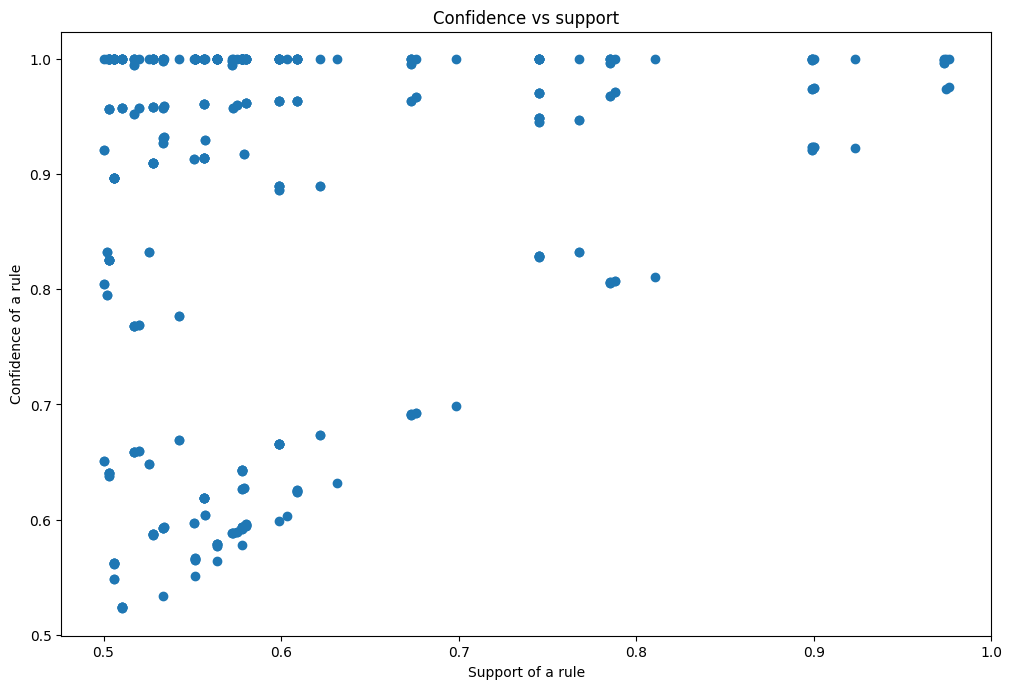

In [9]:
fig=plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["support"], df["confidence"])
plt.title("Confidence vs support")
plt.xlabel("Support of a rule")
plt.ylabel("Confidence of a rule")
plt.show()

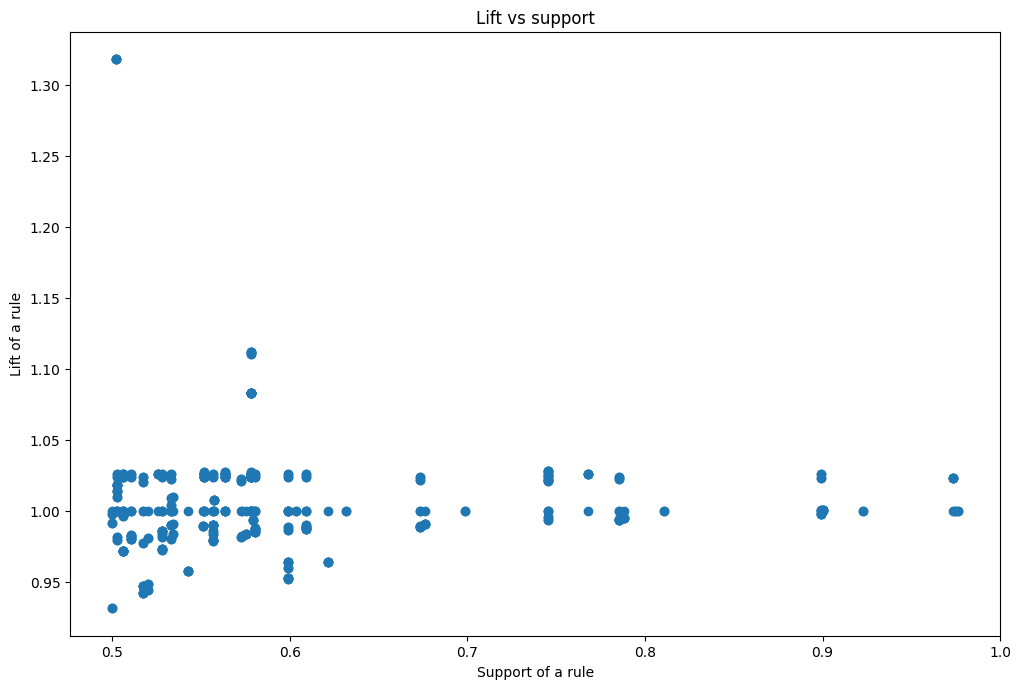

In [10]:
fig=plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["support"], df["lift"])
plt.title("Lift vs support")
plt.xlabel("Support of a rule")
plt.ylabel("Lift of a rule")
plt.show()

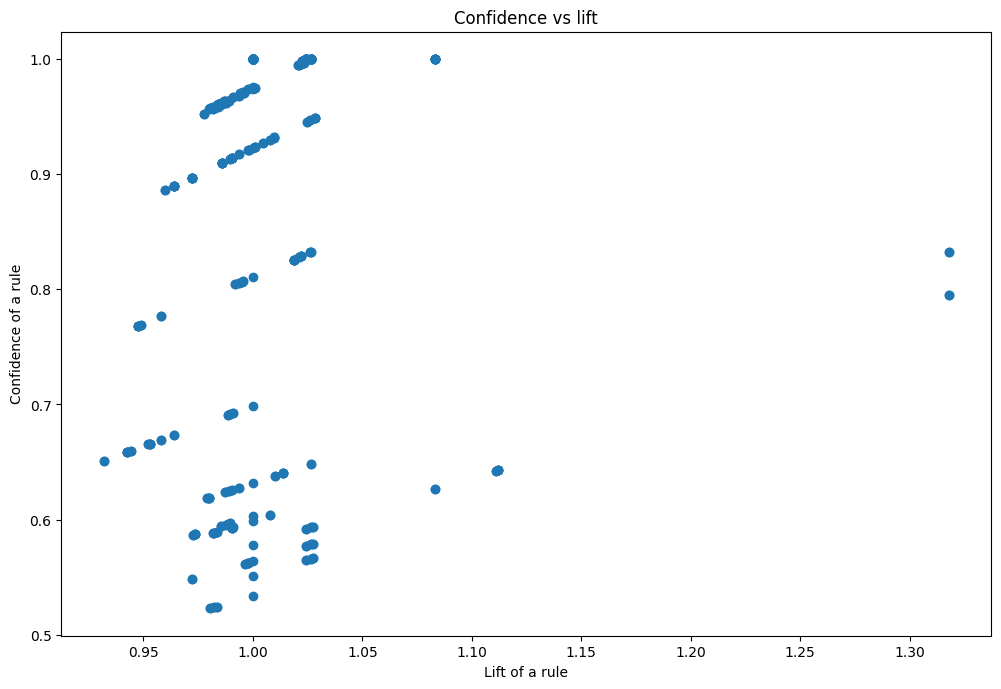

In [11]:
fig=plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["lift"], df["confidence"])
plt.title("Confidence vs lift")
plt.xlabel("Lift of a rule")
plt.ylabel("Confidence of a rule")
plt.show()

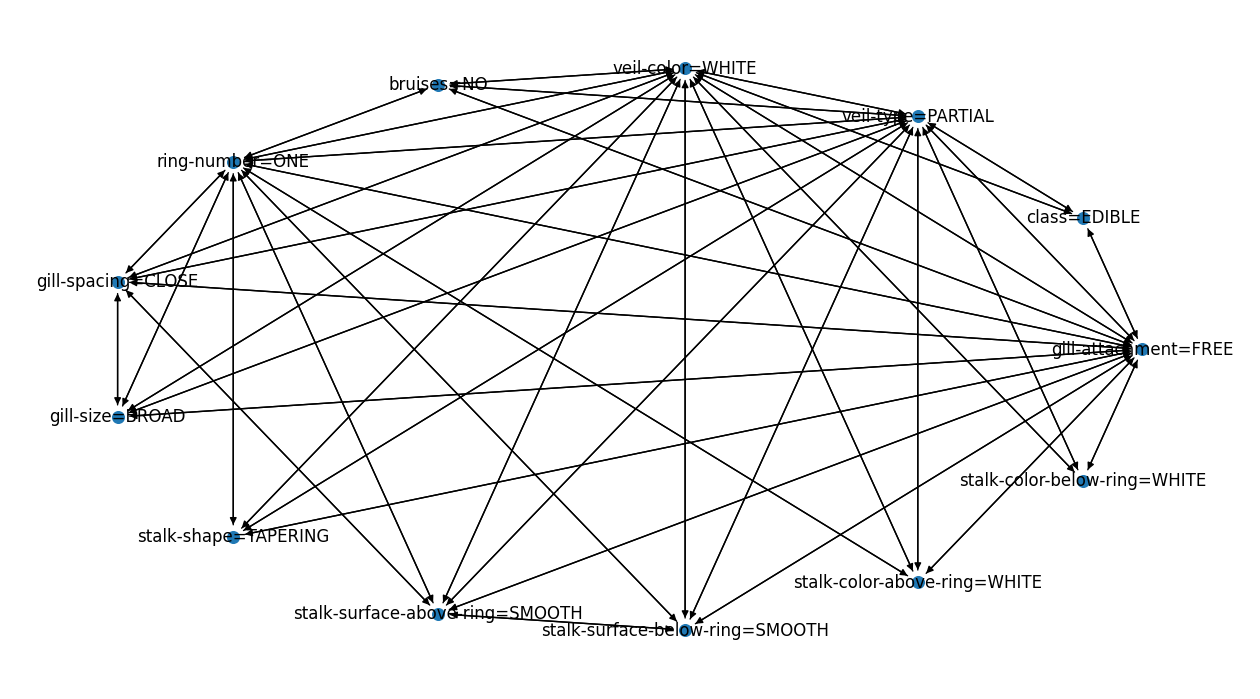

In [35]:
fig=plt.figure(figsize=(16, 9), dpi=100)
G = nx.DiGraph()

for (idx, row) in df.iterrows():
    lhs = str(row.lhs).replace("[", "").replace("]", "").split(", ")
    rhs = str(row.rhs).replace("[", "").replace("]", "")
    for l in lhs:
        G.add_edge(l, rhs)
    
pos = nx.circular_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=70)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


plt.axis("off")
plt.show()